# Figure 2: Map colored by conditional probabilities

### 1. Load packages

In [13]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

<module 'loadquakes' from '/home/amand4/notebooks/SLIM/loadquakes.py'>

### 2. Load datasets

In [14]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv')
NND_declustered_v2 = pd.read_csv('NND_declustered_v2.csv') # testing with eta0 = 10**3

### 3. Plot the SLIQs from the full catalog with highest conditional probability

In [15]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'SLIQs with highest conditional probability (full catalog)'}, xlabel='Longitude', ylabel='Latitude'>

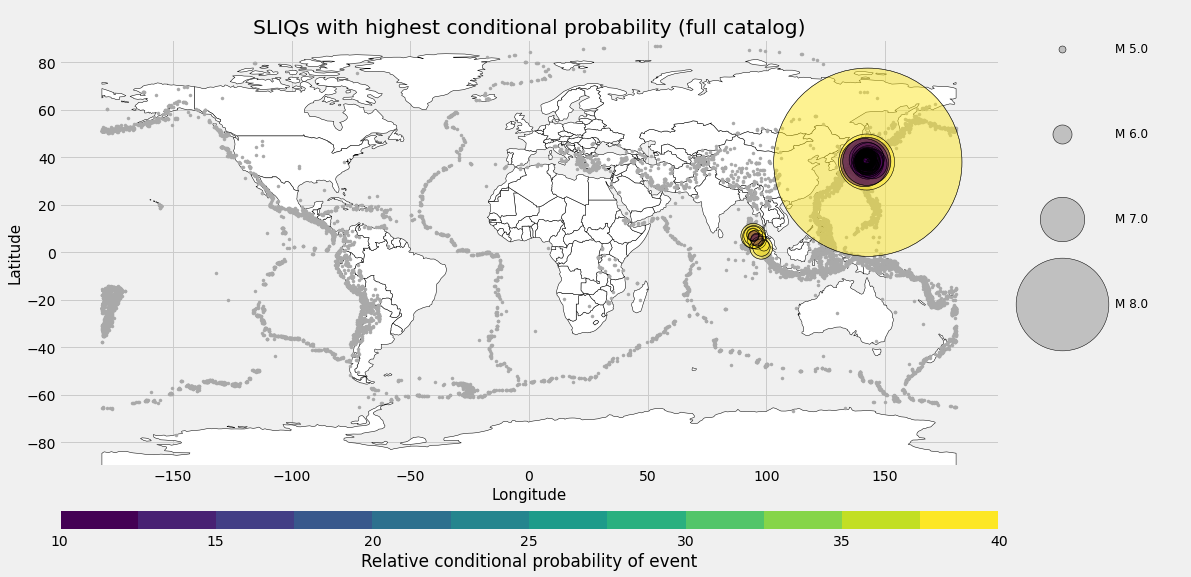

In [16]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

loadquakes.probability_map_cb(catalog,sliq_full.head(100),sliq_full.cp.head(100),
                              'SLIQs with highest conditional probability (full catalog)',
                              10,40,11,circle_scale=1e-6)



### 4. Plot the SLIQs from the ETAS catalog with highest conditional probability

In [17]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)

sliq_etas['dmass']=sliq_etas['dmass'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading'}, xlabel='Longitude', ylabel='Latitude'>

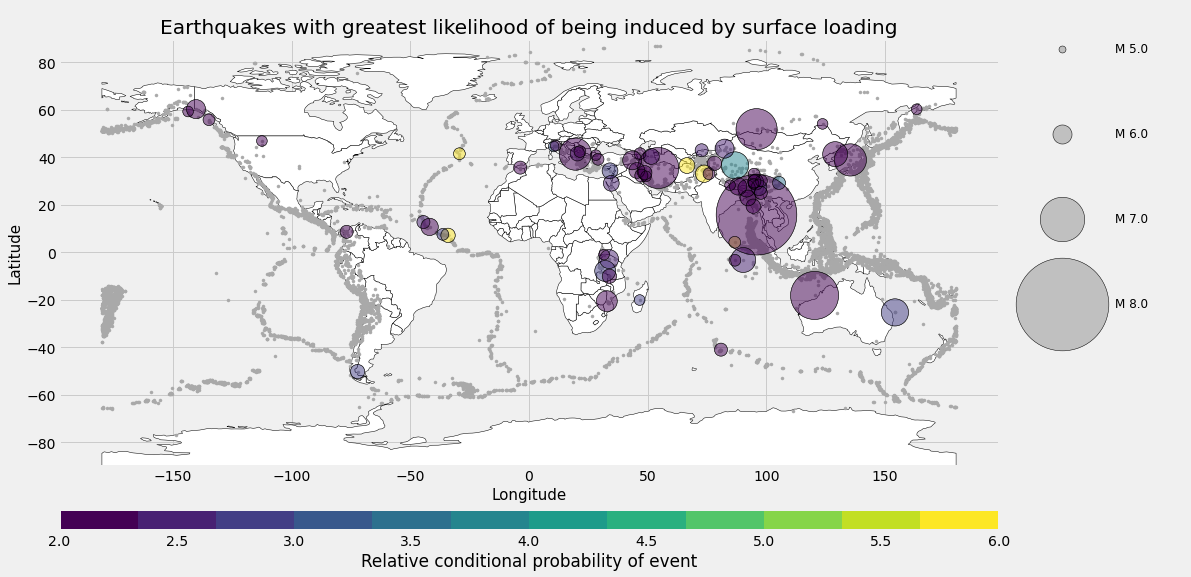

In [18]:
importlib.reload(loadquakes)

cp_threshold=1.59

loadquakes.probability_map_cb(catalog,sliq_etas[sliq_etas.cp>cp_threshold],
                              sliq_etas.cp[sliq_etas.cp>cp_threshold],
                              'Earthquakes with greatest likelihood of being induced by surface loading',
                              2,6,11,circle_scale=1e-6)

In [19]:
sliq_etas[sliq_etas.cp>cp_threshold]

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,25.80,31.352074,11.914214
1,11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,33.00,31.846877,11.914214
2,11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,10.00,31.683223,11.914214
3,3125,3127,-1.0355,31.6181,2016-09-10 12:27:33.410,5.9,POINT (-1.0355 31.6181),5.4,0.0,6.907373e-11,0.470086,0.529914,1.0,40.00,45.987494,9.359505
4,4410,4412,40.3731,51.5739,2014-06-07 06:05:29.910,5.5,POINT (40.3731 51.5739),5.4,0.0,6.907373e-11,0.792073,0.207927,1.0,30.51,-43.055702,7.904443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,5954,5956,38.7210,43.5080,2011-10-23 10:41:23.250,7.1,POINT (38.721 43.508),5.4,0.0,6.907373e-11,0.873951,0.126049,1.0,18.00,-5.266604,1.591540
63,9358,9360,-3.3880,86.7750,2007-03-22 06:10:43.090,5.9,POINT (-3.388 86.77500000000001),5.4,0.0,6.907373e-11,0.752317,0.247683,1.0,21.00,-5.671643,1.591540
64,11892,11894,55.8404,-134.8827,2003-07-12 23:01:54.103,5.9,POINT (55.8404 -134.8827),5.4,0.0,6.907373e-11,0.599628,0.400372,1.0,10.00,-5.348480,1.591540
65,4333,4335,60.2995,-140.3366,2014-07-17 11:49:33.930,6.0,POINT (60.2995 -140.3366),5.4,0.0,6.907373e-11,0.853174,0.146826,1.0,10.00,-5.479621,1.591540


### 5. Plot the SLIQs from the NND catalog with highest conditional probability

In [20]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)


sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading (NND)'}, xlabel='Longitude', ylabel='Latitude'>

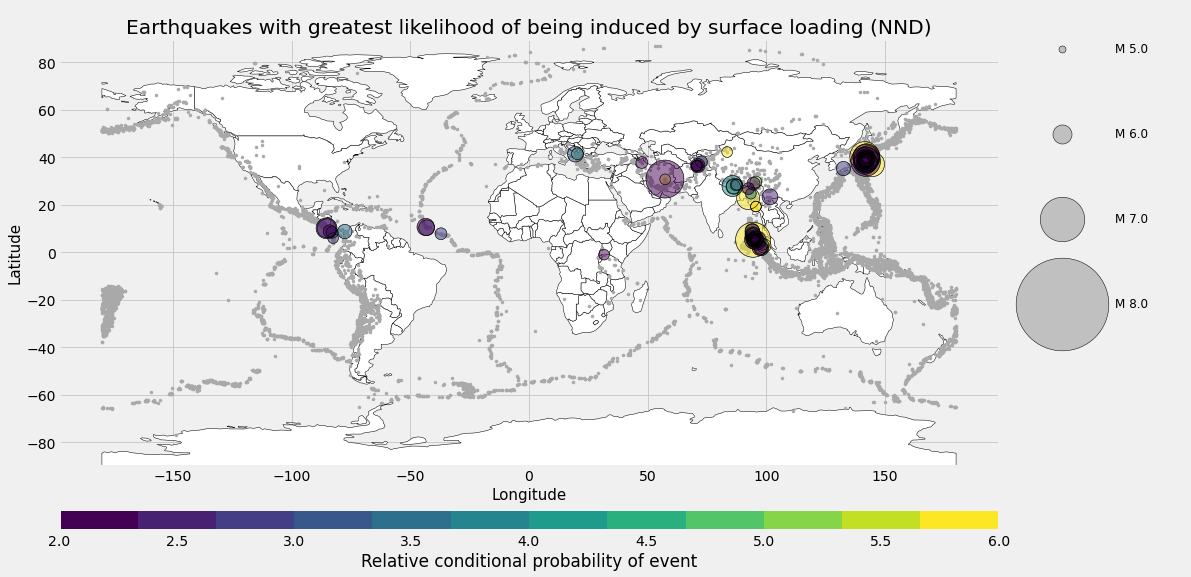

In [21]:
importlib.reload(loadquakes)

loadquakes.probability_map_cb(catalog,sliq_nnd.head(100),sliq_nnd.cp.head(100),
                              'Earthquakes with greatest likelihood of being induced by surface loading (NND)',
                              2,6,11,circle_scale=1e-6)

In [22]:
'''
This version of the map uses the events from NND declustering with eta0 = 10**3
'''
sliq_nnd_v2=NND_declustered_v2.sort_values('cp',ascending=False)
sliq_nnd_v2=sliq_nnd_v2.reset_index()
sliq_nnd_v2=sliq_nnd_v2.drop(['index'], axis=1)


sliq_nnd_v2['dmass']=sliq_nnd_v2['dmass'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading (NND)'}, xlabel='Longitude', ylabel='Latitude'>

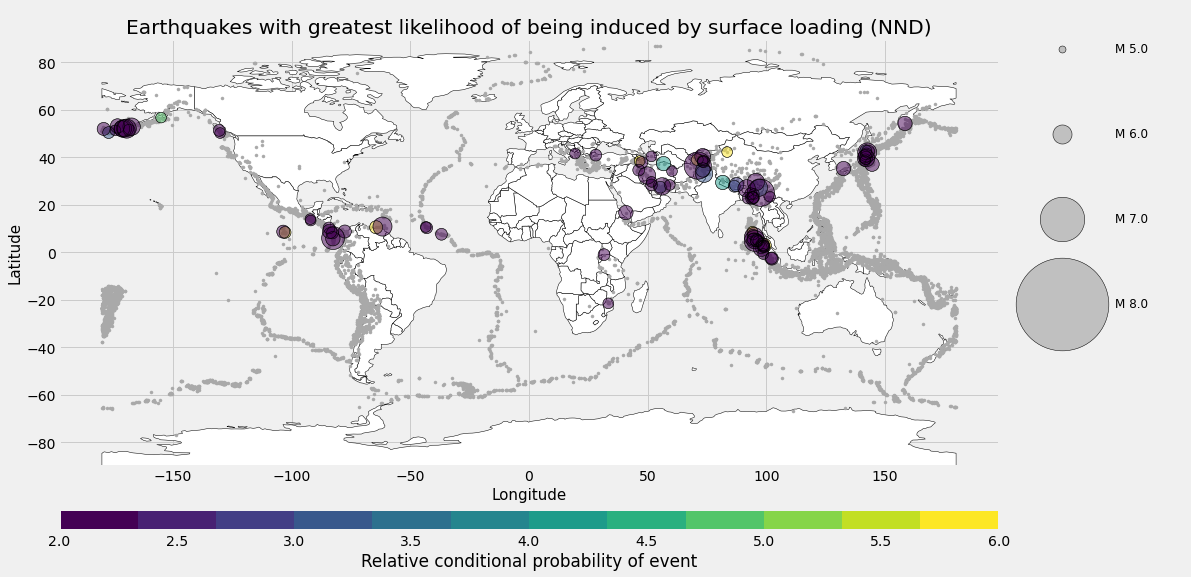

In [23]:
importlib.reload(loadquakes)

loadquakes.probability_map_cb(catalog,sliq_nnd_v2.head(100),sliq_nnd_v2.cp.head(100),
                              'Earthquakes with greatest likelihood of being induced by surface loading (NND)',
                              2,6,11,circle_scale=1e-6)